# About the Dataset


In [52]:
#The Dataset I choose for this project is about the Data Science Fileds. It provides infromation about the Job types present in 
#the field of data science. It also gives information about the companies and its ratings and their locations where they are 
#present. This data set also gives information regarding the salary for a particular designation. What the expected salaries and
#their ranges can be. My plan for the dataset if to find which post and position has most salary and which area has most of the 
#jobs.

# Importing Libraries

In [53]:
library(dplyr)
library(ggplot2)
library(ggmap)
library(tidyverse)
library(plotly)
library(tidyr)
library(RColorBrewer)


apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)


# Reading the Data 


In [54]:
df <- read.csv("data_cleaned_2021.csv", as.is=TRUE, header=TRUE)


In [55]:
# Viewing the sample of a dataset.

In [56]:
head(df)

index Job.Title                 Salary.Estimate            
1 0     Data Scientist            $53K-$91K (Glassdoor est.) 
2 1     Healthcare Data Scientist $63K-$112K (Glassdoor est.)
3 2     Data Scientist            $80K-$90K (Glassdoor est.) 
4 3     Data Scientist            $56K-$97K (Glassdoor est.) 
5 4     Data Scientist            $86K-$143K (Glassdoor est.)
6 5     Data Scientist            $71K-$119K (Glassdoor est.)
  Job.Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [57]:
# viewing the type of data and sample of observations the dataset contains

In [58]:
str(df)

'data.frame':	742 obs. of  42 variables:
 $ index             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Job.Title         : chr  "Data Scientist" "Healthcare Data Scientist" "Data Scientist" "Data Scientist" ...
 $ Salary.Estimate   : chr  "$53K-$91K (Glassdoor est.)" "$63K-$112K (Glassdoor est.)" "$80K-$90K (Glassdoor est.)" "$56K-$97K (Glassdoor est.)" ...
 $ Job.Description   : chr  "Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, "| __truncated__ "What You Will Do:\n\nI. General Summary\n\nThe Healthcare Data Scientist position will join our Advanced Analyt"| __truncated__ "KnowBe4, Inc. is a high growth information security company. We are the world's largest provider of new-school "| __truncated__ "*Organization and Job ID**\nJob ID: 310709\n\nDirectorate: Earth & Biological Sciences\n\nDivision: Biological "| __truncated__ ...
 $ Rating            : num  3.8 3.4 4.8 3.8 2.9 3.4 4.1 3.8 3.3 4.6 ...
 $ Company.Name      : chr 

In [59]:
# removing the redundant and unnecessary columns 

In [60]:
df = subset(df, select = -c(Job.Description) )

In [61]:
head(df)

index,Job.Title,Salary.Estimate,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,⋯,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research 3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,⋯,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System 3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,⋯,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4 4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,⋯,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL 3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,⋯,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions 2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,⋯,0,0,0,0,0,0,0,data scientist,na,na
5,Data Scientist,$71K-$119K (Glassdoor est.),3.4,CyrusOne 3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,Company - Public,⋯,0,0,0,1,0,1,0,data scientist,na,na


In [62]:
# Calculating the total number of rows 
nrow(df)

[1] 742

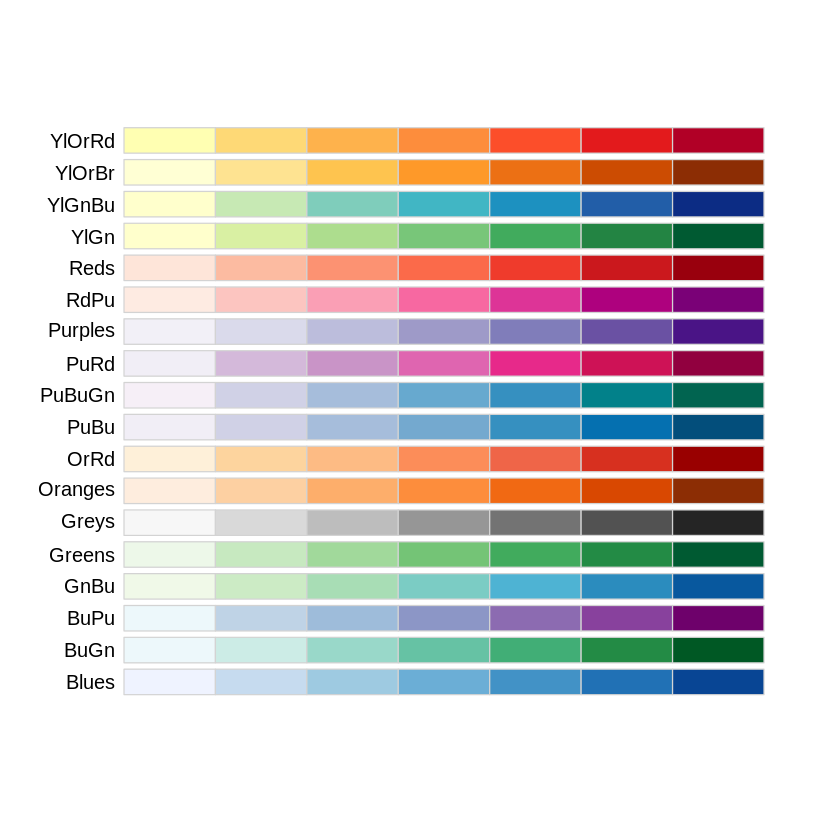

In [63]:
display.brewer.all(n =7, type = "seq" ,colorblindFriendly = TRUE)


# Visualization 1


In [64]:
# In this we are finding which job position/post is the most popular one.
# We count the distinct job titles and we plot them.

In [65]:
df1<- df%>%
      count(job_title_sim)


df1<-data.frame(df1)

df1<-head(df1[order(df1$n, decreasing = TRUE),],15)
df1

,job_title_sim,n
,<chr>,<int>
5,data scientist,313
10,other scientist,143
3,data engineer,119
1,analyst,101
8,machine learning engineer,22
6,Data scientist project manager,16
9,na,10
2,data analitics,8
4,data modeler,5


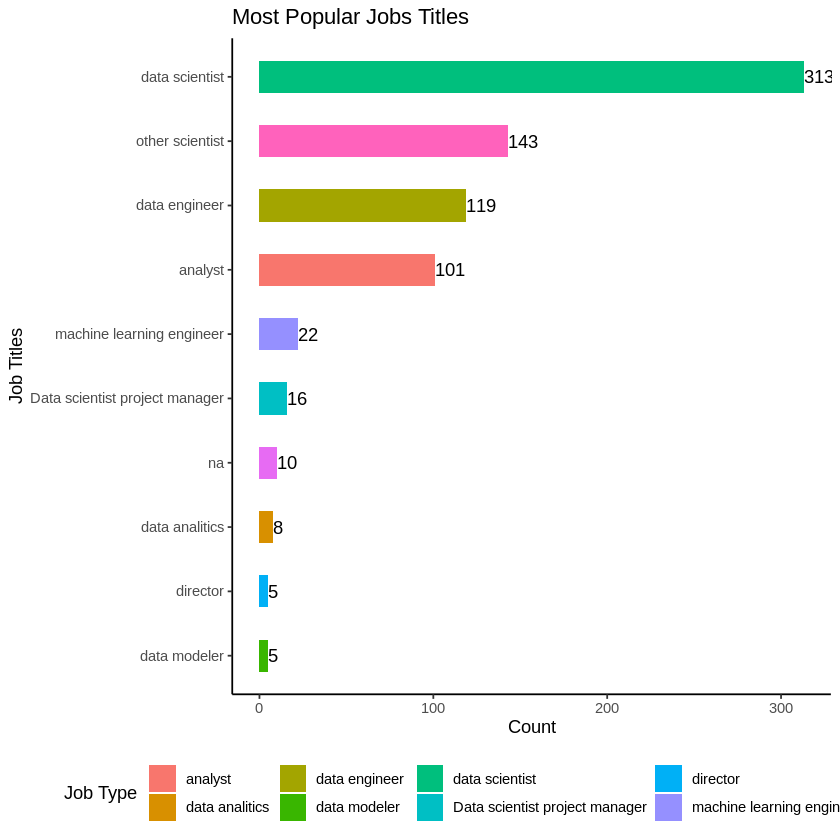

In [66]:
#Plotting as Categorial Data where different Job Titles are differernt categories 
v1<-ggplot(data=df1, aes(x=reorder(job_title_sim,n), y=n,fill=job_title_sim)) +
  geom_bar(stat="identity", width=0.5)+  geom_text(aes(label = n), hjust = 0)+coord_flip()+ggtitle("Most Popular Jobs Titles")+xlab("Job Titles")+ylab("Count")+  labs(fill='Job Type')
v1<-v1+theme_classic()+theme(legend.position="bottom")
 
v1

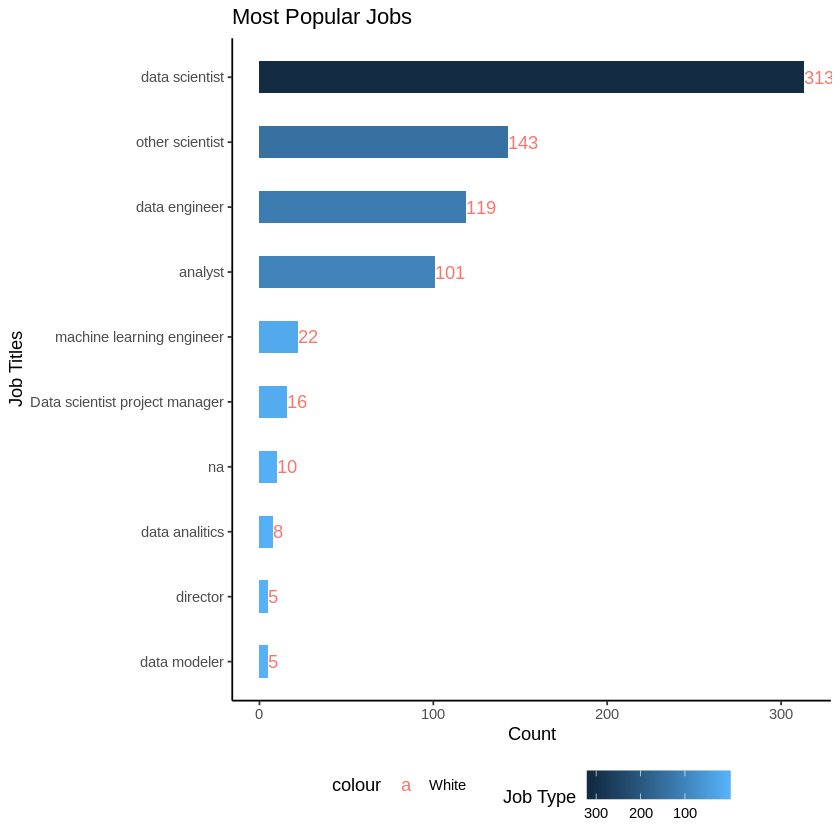

In [67]:
#Plotting as Sequqntial Data where number of people at a particular position are plottled in a sequence
v1<-ggplot(data=df1, aes(x=reorder(job_title_sim,n), y=n,fill=n)) +
  geom_bar(stat="identity", width=0.5)+  geom_text(aes(label = n,color="White"), hjust = 0)+coord_flip()+ggtitle("Most Popular Jobs")+xlab("Job Titles")+ylab("Count")+  labs(fill='Job Type')
v1<-v1+theme_classic()+theme(legend.position="bottom")+ scale_fill_continuous(trans = 'reverse')
 
v1

In [68]:
# From the above visualization we can conclude that Data Scientist is the most popular job with 313 people doing it amongst 
# 742 people. Data Modeler and Director is the least popular jobs with only 5 people each doing it. 

# Visualization 2

In [69]:
# In this we are finding which job location is the most preferred one.
# We count the distinct job locations and we plot them.

In [70]:
df3<- df%>%
      count(Job.Location)


df3<-data.frame(df3)
df31<-head(df3[order(df3$n, decreasing = TRUE),],5)
df31

,Job.Location,n
,<chr>,<int>
3,CA,152
17,MA,103
26,NY,72
35,VA,41
12,IL,40


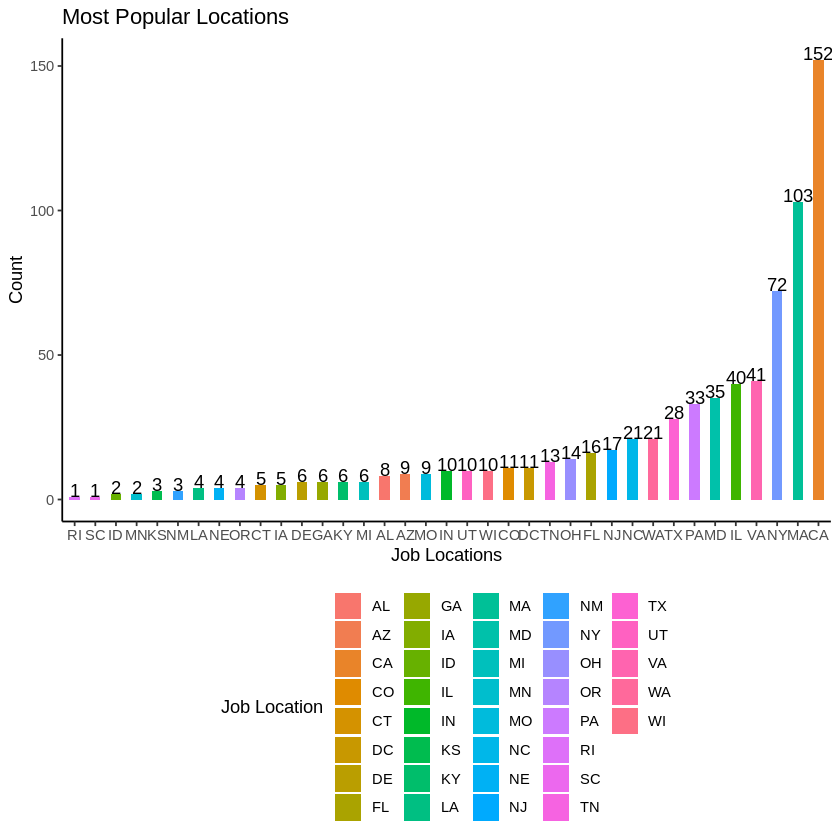

In [71]:
#Plotting all the job locations 
v3<-ggplot(data=df3, aes(x=reorder(Job.Location,n), y=n,fill=Job.Location)) +
  geom_bar(stat="identity", width=0.5)+ geom_text(aes(label = n), vjust = 0)+ggtitle("Most Popular Locations")+xlab("Job Locations")+ylab("Count")+  labs(fill='Job Location')
v3<-v3+theme_classic()+theme(legend.position="bottom")
v3

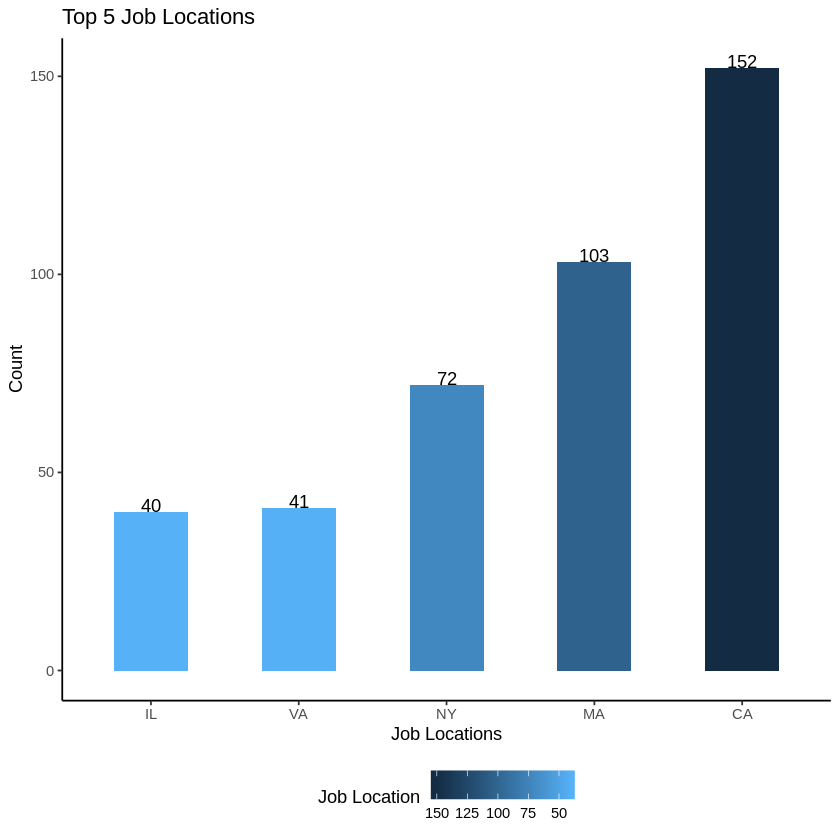

In [72]:
# Plotting the Top 5 Job Locations 
v31<-ggplot(data=df31, aes(x=reorder(Job.Location,n), y=n,fill=n)) +
  geom_bar(stat="identity", width=0.5)+ geom_text(aes(label = n), vjust = 0)+ggtitle("Top 5 Job Locations")+xlab("Job Locations")+ylab("Count")+  labs(fill='Job Location')
v31<-v31+theme_classic()+theme(legend.position="bottom")+ scale_colour_brewer(palette = 1)+
    scale_fill_continuous(trans = 'reverse')
v31

In [73]:
# From the above visulaization we can conclude that CA is offerring most jobs whereas RI and SC are offering bare minimum jobs.

# Visualization 3

In [74]:
# In this we are finding which location has most office headquarters.
# We count the distinct headquarters locations and we plot them.

In [75]:
df10<- df%>%
      count(Headquarters)


df10<-data.frame(df10)
df10<-head(df10[order(df10$n, decreasing = TRUE),],15)
df10

,Headquarters,n
,<chr>,<int>
119,"New York, NY",52
160,"San Francisco, CA",42
42,"Chicago, IL",30
29,"Cambridge, MA",20
24,"Boston, MA",14
129,"OSAKA, Japan",14
176,"Springfield, MA",14
194,"Winston-Salem, NC",14
149,"Reston, VA",12


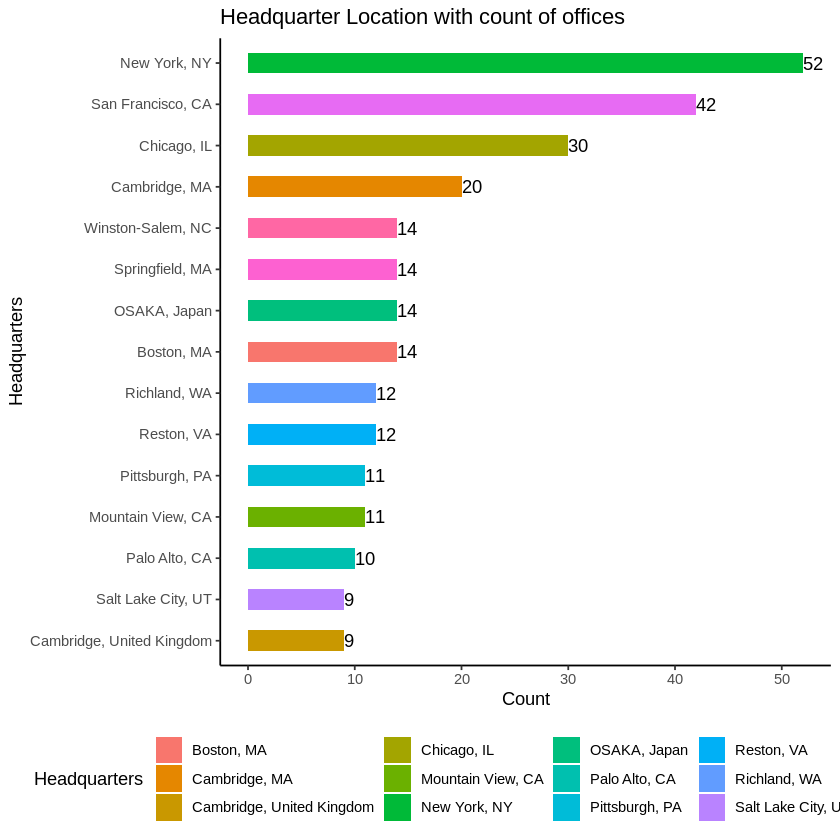

In [76]:
v10<-ggplot(data=df10, aes(x=reorder(Headquarters,n), y=n,fill=Headquarters)) +
  geom_bar(stat="identity", width=0.5)+  geom_text(aes(label = n), hjust = 0)+coord_flip()
v10<-v10+theme_classic()+theme(legend.position="bottom") +xlab("Headquarters") + ylab("Count")+ggtitle("Headquarter Location with count of offices")
v10

In [77]:
# From the above visualization we can conclude that people prefer New York for their office headquarters whereas Cambridge in 
# United Kingdom and Salt Lake City in Utah is the least prefered one.

# Visualization 4

In [78]:
# In this we are trying to find out which Job Sector offers most Data Science Jobs irrespective of the Job Title.

In [79]:
df4<- df%>%
      count(Type.of.ownership)


df4<-data.frame(df4)
df4<-head(df4[order(df4$n, decreasing = TRUE),])
df4

,Type.of.ownership,n
,<chr>,<int>
2,Company - Private,410
3,Company - Public,193
6,Nonprofit Organization,55
9,Subsidiary or Business Segment,34
4,Government,15
5,Hospital,15


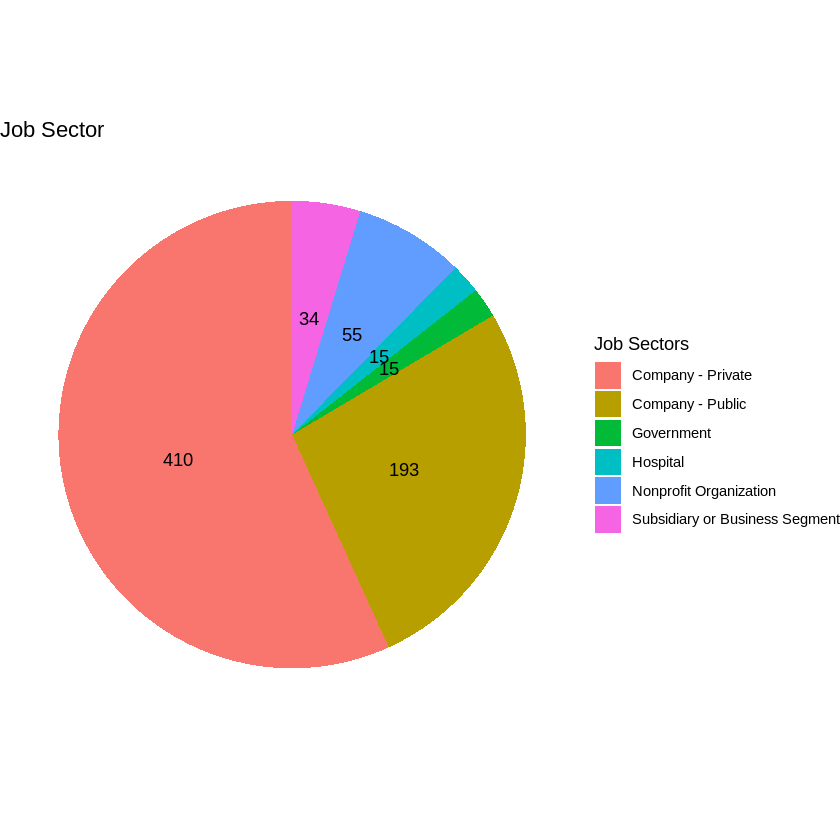

In [80]:
v4<- ggplot(df4, aes(x="", y=n, fill=Type.of.ownership))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=0)+geom_text(aes(label = n),
            position = position_stack(vjust = 0.5))+theme_void()+ggtitle("Job Sector")+labs(fill='Job Sectors')
v4

In [81]:
# From the above visualization we can conclude that more Data Science Jobs are in the Private Sectors and Government and 
# Hospitals have least jobs related to Data Science Jobs

# Visualization 5

In [82]:
# In this we try to analyse which Degree affects the Jobs in the Data Science field.

In [83]:
df5<- df%>%
      count(Degree)


df5<-data.frame(df5)
df5<-head(df5[order(df5$n, decreasing = TRUE),])
df5

,Degree,n
,<chr>,<int>
2,na,383
1,M,252
3,P,107


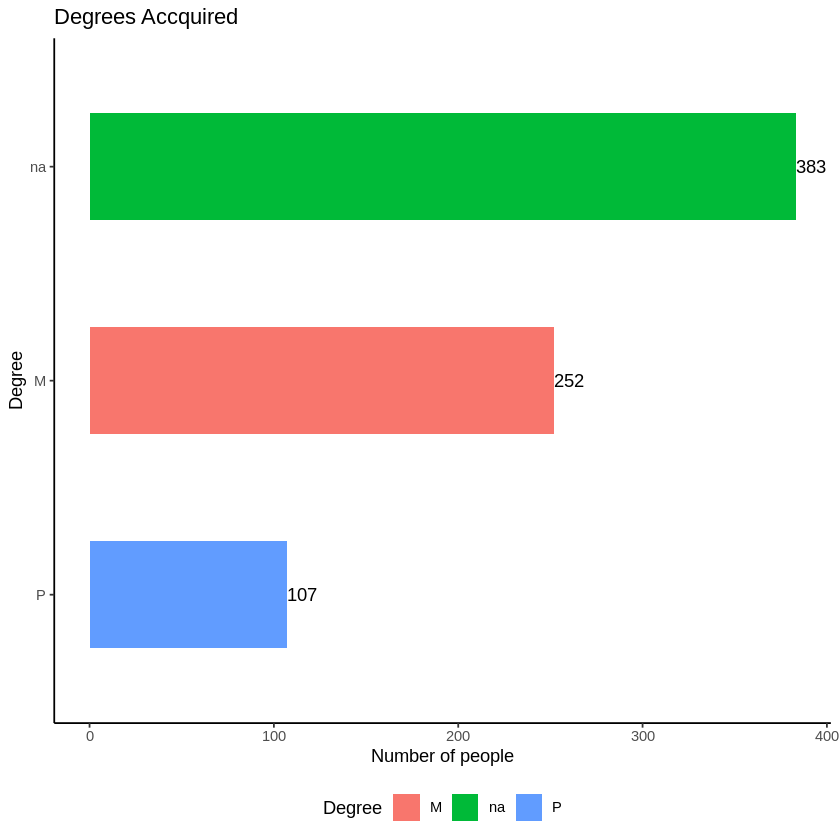

In [84]:
# Plotting a bar graph where the data on the x-axis is categorical
v5<-ggplot(data=df5, aes(x=reorder(Degree,n), y=n,fill=Degree)) +
  geom_bar(stat="identity", width=0.5)+  geom_text(aes(label = n), hjust = 0)+coord_flip()+ggtitle("Degrees Accquired")+xlab("Degree")+ylab("Number of people")+  labs(fill='Degree')
v5<-v5+theme_classic()+theme(legend.position="bottom")
v5

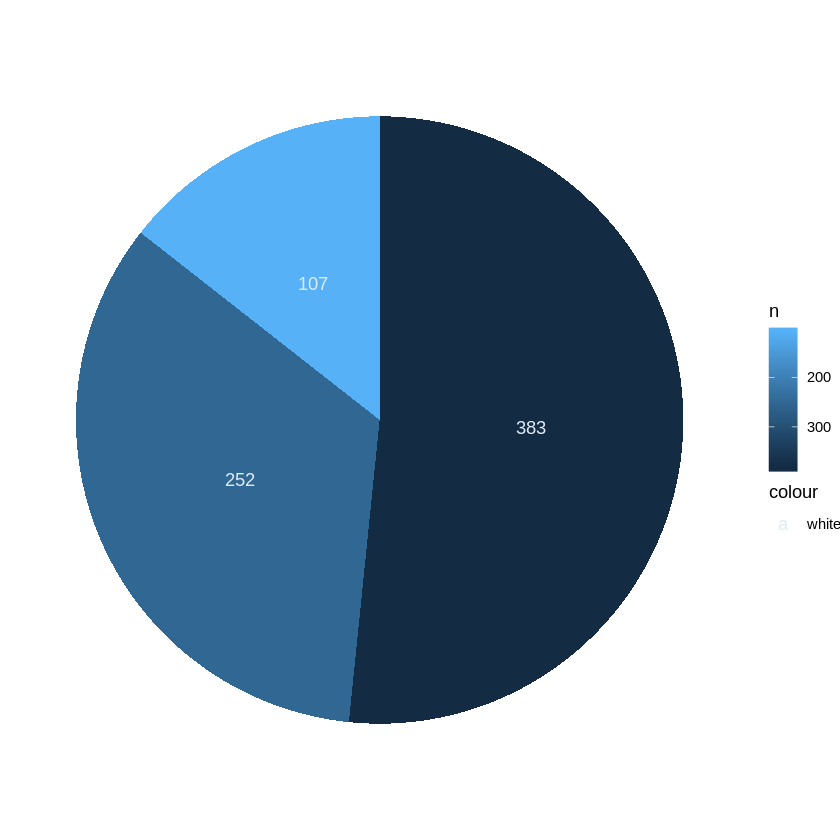

In [85]:
# Plotting a pie chart where the data is sequential
v5<- ggplot(df5, aes(x="", y=n, fill=n))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=0)+geom_text(aes(label = n,color="white"),
            position = position_stack(vjust = 0.5))+theme_void()+ scale_colour_brewer(palette = 1)+
    scale_fill_continuous(trans = 'reverse')
v5

In [86]:
# From the above visualizations we can see the Masters and PHD people have less Jobs in the Data Science field compared to 
# people with other degrees.

# Visualization 6

In [87]:
# In the upcoming cells we try to analyse which data scientist position offers the most salary.

In [88]:
df6<- df%>%
    group_by(job_title_sim,Avg.Salary.K.)%>%
    filter(Job.Location=="CA")%>%
    tally()%>%
    arrange(n)
tail(df6)

job_title_sim,Avg.Salary.K.,n
<chr>,<dbl>,<int>
other scientist,73.0,3
other scientist,111.5,3
analyst,48.5,4
data scientist,142.5,4
Data scientist project manager,64.0,4
data engineer,94.5,5


In [89]:
df7<-aggregate(cbind(df$Avg.Salary.K.,df$Upper.Salary,df$Lower.Salary), by=list(Category=df$job_title_sim), FUN=mean)
df7 <- df7 %>% 
       rename("avg_salary" = "V1","upper_salary" = "V2","lower_salary" = "V3")
df7<-data.frame(df7)
df7

Category,avg_salary,upper_salary,lower_salary
<chr>,<dbl>,<dbl>,<dbl>
analyst,66.11386,85.13861,47.08911
data analitics,69.25000,82.75000,55.75000
data engineer,105.40336,134.65546,76.15126
data modeler,77.50000,98.60000,56.40000
data scientist,118.29393,146.47923,90.10863
Data scientist project manager,73.21875,96.25000,50.18750
director,130.80000,166.80000,94.80000
machine learning engineer,126.43182,162.50000,90.36364
na,91.45000,118.30000,64.60000


In [90]:
df8<-df7 %>% 
  gather(avg_salary, upper_salary,lower_salary, key = "type", value = "amount")
df8

Category,type,amount
<chr>,<chr>,<dbl>
analyst,avg_salary,66.11386
data analitics,avg_salary,69.25000
data engineer,avg_salary,105.40336
data modeler,avg_salary,77.50000
data scientist,avg_salary,118.29393
Data scientist project manager,avg_salary,73.21875
director,avg_salary,130.80000
machine learning engineer,avg_salary,126.43182
na,avg_salary,91.45000


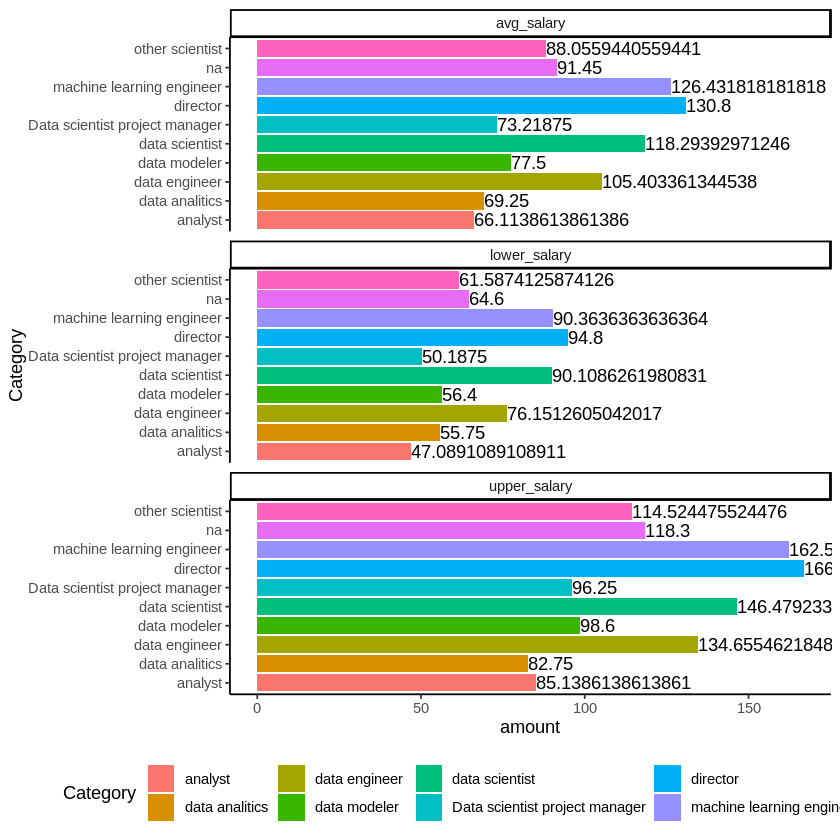

In [91]:
#Plotting the different Data Science Jobs with respect to their average , minimum and maximum slary
v8<-ggplot(df8, aes(x=Category, y=amount, fill=Category)) +
  geom_bar(stat="identity", position=position_dodge())+  geom_text(aes(label = amount), hjust = 0)+facet_wrap(~type, nrow = 3)+theme(legend.position="bottom")+coord_flip()
v8<-v8+theme_classic()+theme(legend.position="bottom")
v8

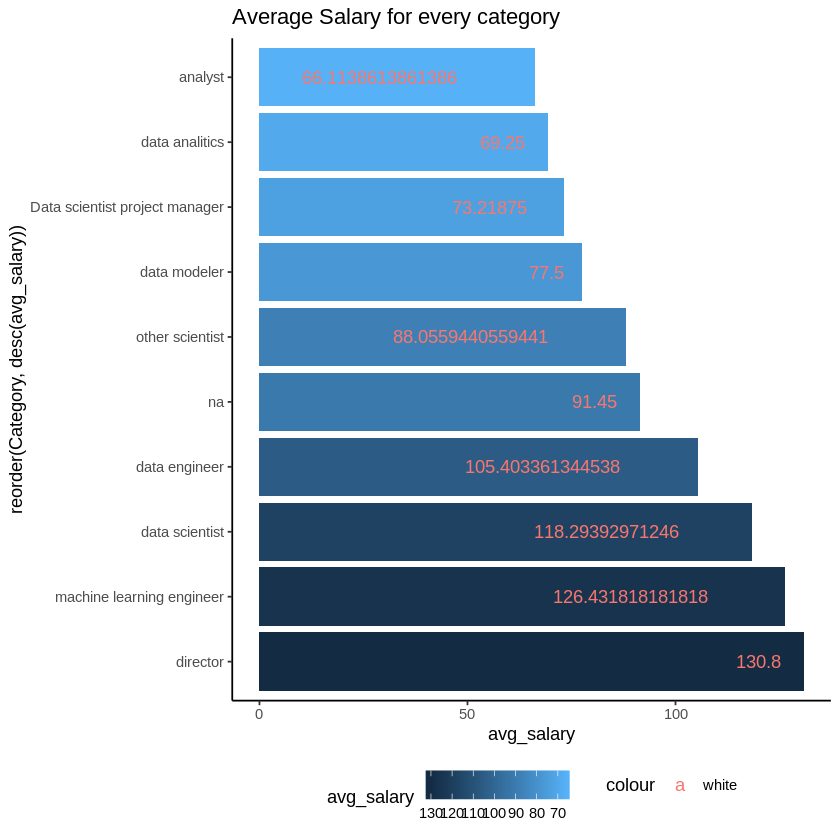

In [92]:
v81<-ggplot(df7, aes(x=reorder(Category,desc(avg_salary)), y=avg_salary, fill=avg_salary)) +
  geom_bar(stat="identity", position=position_dodge())+  geom_text(aes(label = avg_salary,color="white"), hjust =1.5)+theme(legend.position="bottom")+coord_flip()
v81<-v81+theme_classic()+theme(legend.position="bottom")+ggtitle("Average Salary for every category")+ 
    scale_fill_continuous(trans = 'reverse')
v81

In [93]:
# From the above visualizations we can find out the Director and Machine Learning Engineers earn the most in the Data Science 
# field.

# Visualization 7

In [94]:
# In this we try to figure out which Field of the Job Market offer most salary.

In [95]:
df9<-aggregate(cbind(df$Avg.Salary.K.), by=list(Sector=df$Sector), FUN=sum)
df9<- df9 %>% 
    rename("salary" = "V1")
df9<-data.frame(df9)
df9 <- df9[order(-df9$salary),]
df9


,Sector,salary
,<chr>,<dbl>
14,Information Technology,20374.5
6,Biotech & Pharmaceuticals,12557.5
7,Business Services,9477.0
15,Insurance,7310.0
11,Finance,4117.5
13,Health Care,3776.0
16,Manufacturing,2857.5
3,Aerospace & Defense,2476.5
10,Education,2317.0


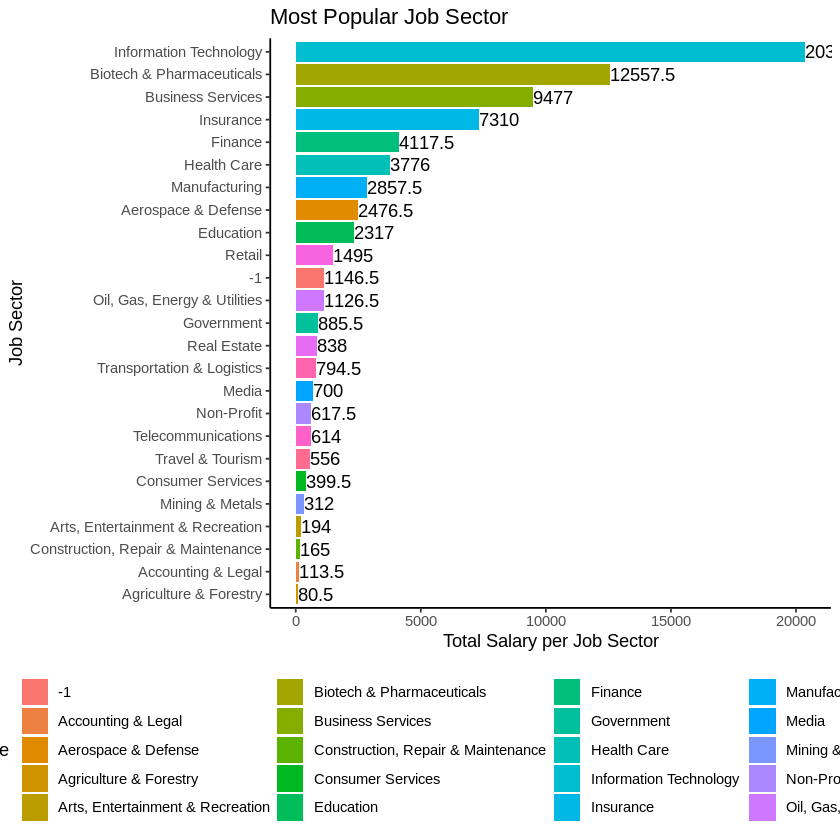

In [96]:
v9<-ggplot(df9, aes(x=reorder(df9$Sector,df9$salary), y=df9$salary,fill=df9$Sector)) +  geom_bar(stat="identity", position=position_dodge())+  geom_text(aes(label = df9$salary), hjust = 0)+coord_flip()+ggtitle("Most Popular Job Sector")+xlab("Job Sector")+ylab("Total Salary per Job Sector")+  labs(fill='Job Type')+theme(legend.position = "bottom")
v9<-v9+theme_classic()+theme(legend.position="bottom")
v9

In [97]:
df91<-head(df9,5)
df91

,Sector,salary
,<chr>,<dbl>
14,Information Technology,20374.5
6,Biotech & Pharmaceuticals,12557.5
7,Business Services,9477.0
15,Insurance,7310.0
11,Finance,4117.5


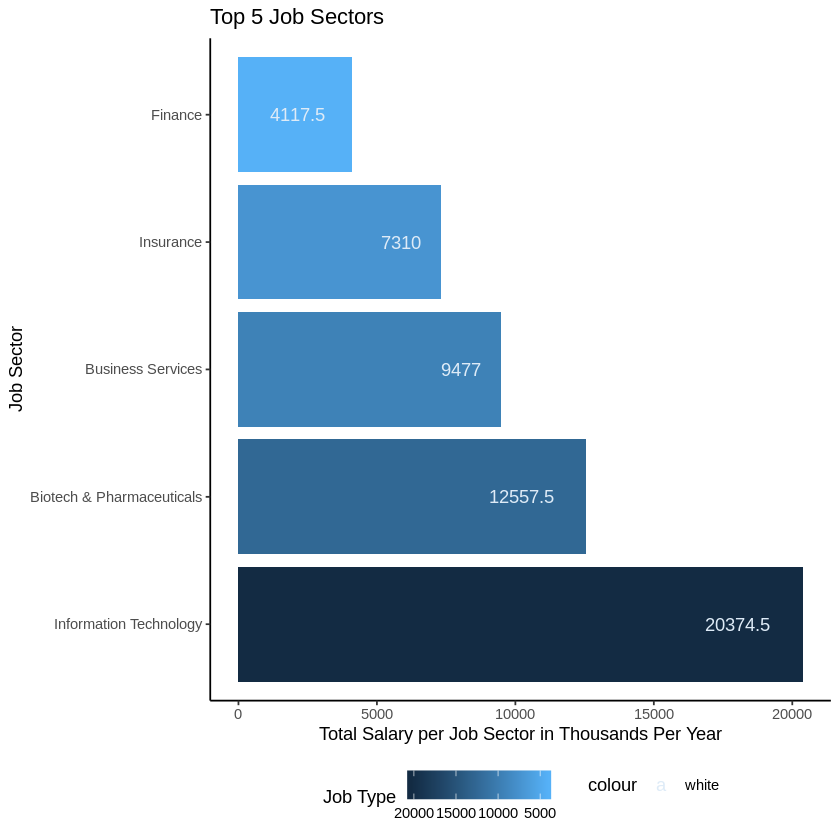

In [98]:
v91<-ggplot(df91, aes(x=reorder(df91$Sector,desc(df91$salary)), y=df91$salary,fill=df91$salary)) +  geom_bar(stat="identity", position=position_dodge())+  geom_text(aes(label = df91$salary,color="white"), hjust = 1.5)+ggtitle("Top 5 Job Sectors")+xlab("Job Sector")+ylab("Total Salary per Job Sector in Thousands Per Year")+  labs(fill='Job Type')+theme(legend.position = "top")+coord_flip()
v91<-v91+theme_classic()+theme(legend.position="bottom")+ scale_colour_brewer(palette = 1)+
    scale_fill_continuous(trans = 'reverse')
v91

In [99]:
# In the above visualizations we can see that there are around 20 and the Information Technology offers the highest pay whereas 
# Agriculture & Forestory offers the least i.e. 80K. Information Technology has 25 times more pay than the Agriculture & 
# Forestory.

# Visualization 8

In [100]:
# In below cells we try find which skill is most used and in which sector 

In [101]:
df11<-aggregate(cbind(df$Python,df$aws,df$spark,df$excel,df$sql,df$sas,df$keras,df$pytorch,df$scikit,df$tensor,df$hadoop,df$bi,df$tableau,df$flink,df$google_an,df$mongo), by=list(Category=df$job_title_sim), FUN=sum)
df11<-data.frame(df11)

df11 <- df11 %>% 
       rename("python" = "V1","aws" = "V2","spark" = "V3","excel" = "V4","sql" = "V5","sas" = "V6","keras" = "V7","pytorch" = "V8","scikit" = "V9","tensor" = "V10","hadoop" = "V11","bi" = "V12","tableau" = "V13","flink" = "V14","google_an" = "V15","mongo" = "V16")
df11<-data.frame(df11)
df11


Category,python,aws,spark,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,bi,tableau,flink,google_an,mongo
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
analyst,31,10,6,77,75,11,0,0,0,0,3,17,40,0,11,3
data analitics,5,0,0,4,4,2,0,0,0,0,0,2,4,0,0,0
data engineer,77,59,67,54,87,1,0,0,0,2,50,3,11,6,0,13
data modeler,2,2,1,4,4,0,0,0,0,0,1,2,0,0,0,0
data scientist,240,79,84,155,176,50,29,33,47,60,60,28,76,4,3,19
Data scientist project manager,4,2,0,11,11,0,0,0,0,0,0,2,12,0,0,0
director,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0
machine learning engineer,18,6,4,7,13,0,0,5,7,9,4,0,0,0,0,0
na,4,3,5,9,7,0,0,0,0,0,6,2,5,0,0,2


In [102]:
df12<-df11 %>% 
  gather(python,aws,spark,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,bi,tableau,flink,google_an,mongo, key = "Skills", value = "Count")
df12

Category,Skills,Count
<chr>,<chr>,<int>
analyst,python,31
data analitics,python,5
data engineer,python,77
data modeler,python,2
data scientist,python,240
Data scientist project manager,python,4
director,python,0
machine learning engineer,python,18
na,python,4


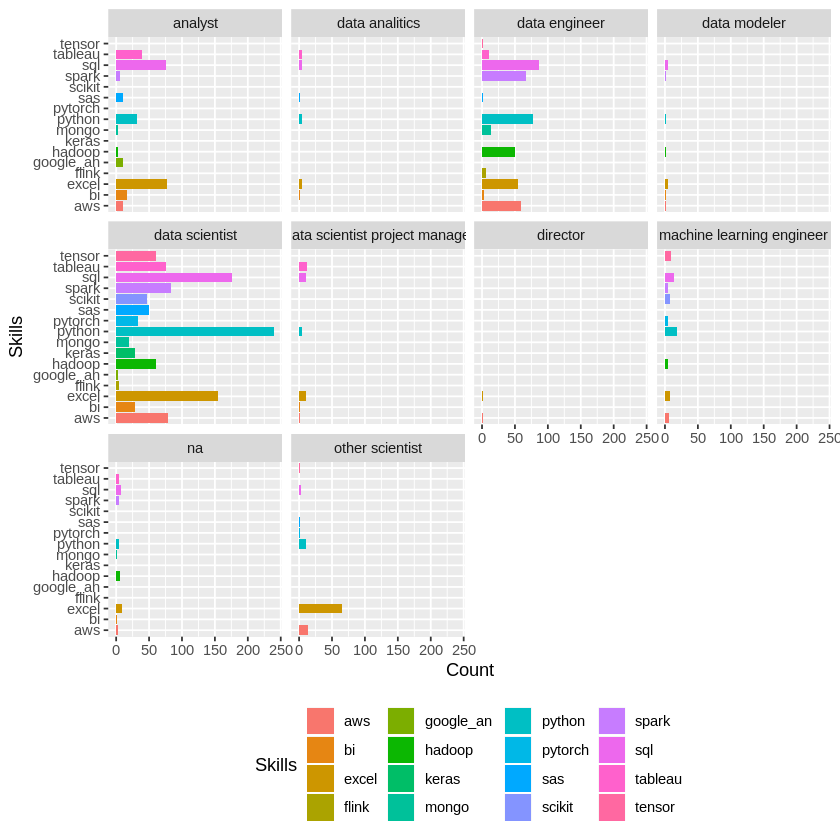

In [103]:
v12<-ggplot(df12, aes(x=Skills, y=Count, fill=Skills)) +
  geom_bar(stat="identity", position=position_dodge())+facet_wrap(~Category)+theme(legend.position = "bottom")+coord_flip()
v12

In [104]:
# We can infer from the above graphs that different job positions use different skill set.

In [107]:
df13<- df%>%
      count(company_txt)


df13<-data.frame(df13)
df13<-head(df13[order(df13$n, decreasing = TRUE),],10)
df13

,company_txt,n
,<chr>,<int>
184,MassMutual,14
251,Reynolds American,14
295,Takeda Pharmaceuticals,14
275,Software Engineering Institute,11
177,Liberty Mutual Insurance,10
236,PNNL,10
27,AstraZeneca,9
193,MITRE,8
10,Advanced BioScience Laboratories,7


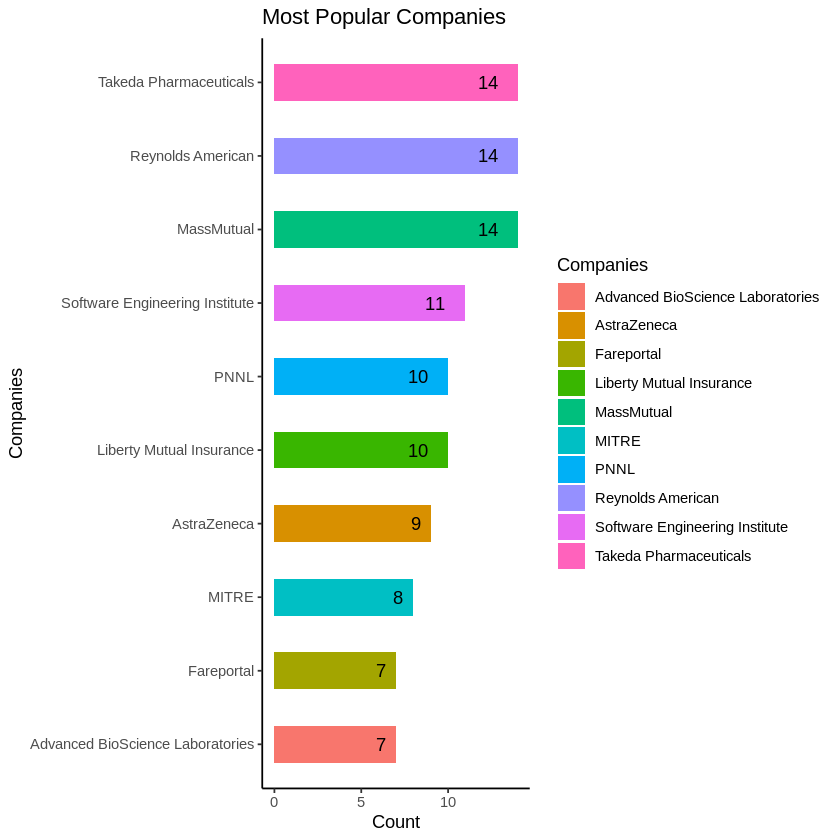

In [113]:
v13<-ggplot(data=df13, aes(x=reorder(company_txt,n), y=n,fill=company_txt)) +
  geom_bar(stat="identity", width=0.5)+  geom_text(aes(label = n), hjust = 2)+coord_flip()+ggtitle("Most Popular Companies")+xlab("Companies")+ylab("Count")+ labs(fill='Companies')
v13<-v13+theme_classic()
 
v13